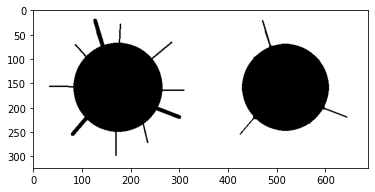

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
origin=cv2.imread('./origin.png')
# b,g,r=cv2.split(origin)
kernel=np.ones((3,3),np.uint8)
erode=cv2.dilate(origin,kernel,iterations=2)
origin1=np.hstack((origin,erode))
plt.imshow(origin1)

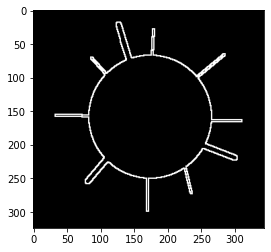

In [2]:
gradient=cv2.morphologyEx(origin,cv2.MORPH_GRADIENT,kernel)
plt.imshow(gradient)

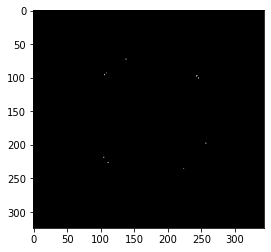

In [3]:
tophat=cv2.morphologyEx(origin,cv2.MORPH_TOPHAT,kernel)
plt.imshow(tophat)

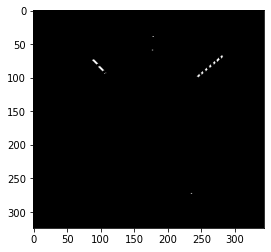

In [4]:
blackhat=cv2.morphologyEx(origin,cv2.MORPH_BLACKHAT,kernel)
plt.imshow(blackhat)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


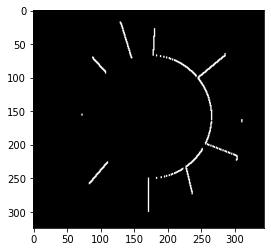

In [5]:
sobelx=cv2.Sobel(origin,cv2.CV_64F,1,0,1)
plt.imshow(sobelx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


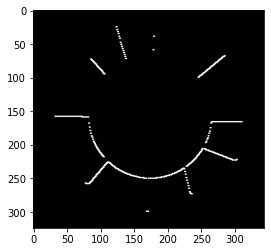

In [6]:
sobely=cv2.Sobel(origin,cv2.CV_64F,0,1,1)
plt.imshow(sobely)

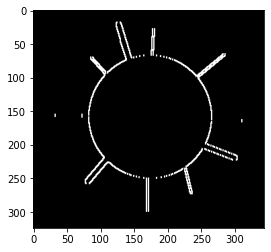

In [7]:
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.convertScaleAbs(sobely)
plt.imshow(sobelx)

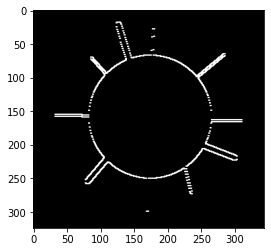

In [8]:
plt.imshow(sobely)

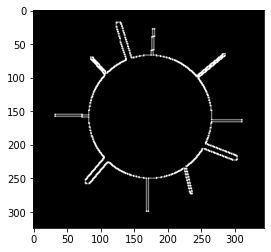

In [9]:
sobelxy=cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
plt.imshow(sobelxy)

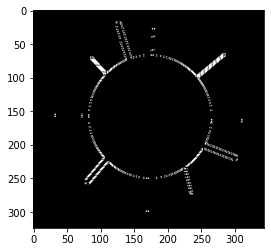

In [10]:
sobelxy_1=cv2.Sobel(origin,cv2.CV_64F,1,1,1)
sobelxy_1=cv2.convertScaleAbs(sobelxy_1)
plt.imshow(sobelxy_1)

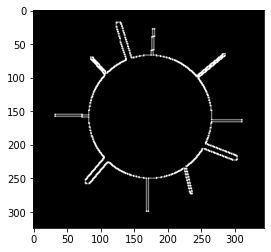

In [11]:
scharrx=cv2.Scharr(origin,cv2.CV_64F,1,0,1)
scharry=cv2.Scharr(origin,cv2.CV_64F,0,1,1)
scharrx=cv2.convertScaleAbs(scharrx)
scharry=cv2.convertScaleAbs(scharry)
scharrxy=cv2.addWeighted(scharrx,0.5,scharry,0.5,0)
plt.imshow(scharrxy)

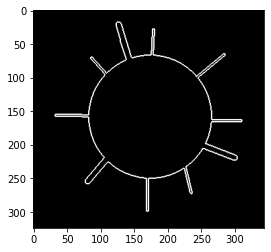

In [12]:
laplacian=cv2.Laplacian(origin,cv2.CV_64F)
laplacian=cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian)

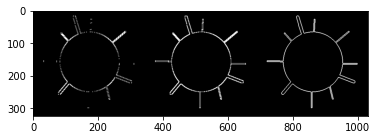

In [13]:
res=np.hstack((sobelxy_1,scharrxy,laplacian))
plt.imshow(res)

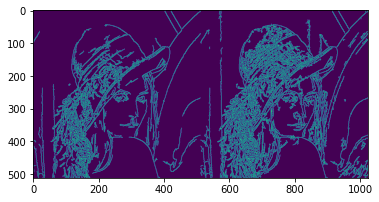

In [14]:
lena=cv2.imread('./lena.jpg',cv2.IMREAD_GRAYSCALE)
v1=cv2.Canny(lena,50,150)
v2=cv2.Canny(lena,20,100)
res=np.hstack((v1,v2))
plt.imshow(res)

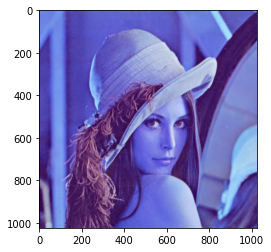

In [15]:
lena=cv2.imread('./lena.jpg')
# lenadown=cv2.pyrDown(lena)
# cv2.imshow('lena',lenadown)
lenaup=cv2.pyrUp(lena)
plt.imshow(lenaup)
# cv2.imshow('lena',lenaup)
# key=cv2.waitKey(0)
# if key==ord('q'):
#     cv2.destroyAllWindows()


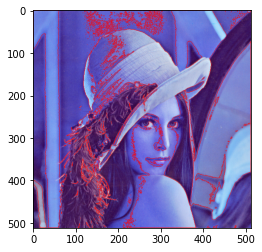

In [16]:
lena=cv2.imread('./lena.jpg')
lena_gray=cv2.cvtColor(lena,cv2.COLOR_BGR2GRAY)
ret,thresh=cv2.threshold(lena_gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
draw_img=lena.copy()
res=cv2.drawContours(draw_img,contours,-1,(255,0,0),1)
# cv2.imshow('lena',res)
# key=cv2.waitKey(0)
# if key==ord('q'):
#     cv2.destroyAllWindows()
plt.imshow(res)

In [17]:
lena1=lena.copy()
for i in contours:
    area=cv2.contourArea(i)
    length=cv2.arcLength(i,True)
    epsilon=0.0001*length
    approx=cv2.approxPolyDP(i,epsilon,True)
    res=cv2.drawContours(lena1,[approx],-1,(0,255,0),1)
    print(area)
cv2.imshow('lena',lena1)
key=cv2.waitKey(0)
if key==ord('q'):
    cv2.destroyAllWindows()

0.0
0.0
3.0
0.0
11.5
0.0
0.0
27.5
0.0
0.0
11.0
2.0
0.0
1.5
0.0
0.0
4.0
0.0
5.5
0.0
0.0
0.5
0.0
13.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
14.0
0.0
0.5
0.0
3.0
0.0
0.0
0.5
0.0
0.0
1.0
0.0
71.5
4.0
14.5
0.5
0.0
0.0
0.0
0.0
3.5
6.0
0.0
2.0
0.0
26.0
2.0
4.0
29.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
0.0
0.5
12.5
0.0
0.0
0.0
0.0
0.0
4.0
1.0
0.0
0.0
3.5
2.0
0.0
0.0
0.0
5.5
0.0
0.0
0.0
1365.0
0.5
0.0
14.0
39.5
2.5
4.0
0.0
0.0
20.0
0.0
0.0
0.0
0.5
1.0
0.0
0.0
22.0
4.0
25.5
0.0
5.5
0.0
0.0
0.0
1.5
0.0
120.5
4.0
4.0
4.0
7.0
0.0
48.0
0.0
0.0
1.0
15.5
0.0
0.0
2.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
10.5
0.0
2.5
0.0
0.5
0.0
0.0
0.0
0.0
1.5
0.0
4.0
0.0
0.0
18.0
0.0
6.5
7.0
5.5
0.5
0.0
0.0
0.0
30.5
0.5
6.5
2.0
0.0
39.5
0.0
0.0
0.0
64.5
0.0
1.0
32.5
0.0
0.0
0.0
0.0
62.5
0.0
0.0
9.5
3.5
5.5
10.0
1.0
0.0
47.0
0.0
0.0
6.0
2.0
0.0
0.0
1.5
1.0
22.5
0.0
0.0
0.0
0.0
0.0
64.5
0.0
0.0
12.0
0.0
0.5
683.5
4.0
2.0
4.0
14.0
13.0
2.0
2.0
2.0
2.0
2.0
7.0
27.0
2.0
0.0
8.0
44.0
11.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

In [ ]:
(x,y,w,h)=cv2.boundingRect(contours[7])
img=cv2.rectangle(lena,(x,y),(x+w,y+h),(0,255,0),1)
cv2.imshow('lena',img)
key=cv2.waitKey(0)
if key==ord('q'):
    cv2.destroyAllWindows()